<h1>Chapter 4: POS tagging</h1>

The zip archive alice.zip contains the novel, Alice’s Adventures in Wonderland (written by Lewis Carroll) distributed on Project Gutenberg, as a text file alice.txt. Apply a part-of-speech (POS) tagger to the text file, and store the result in another file. Implement programs that read the POS tagging result and perform the jobs.

For your convenience, the zip archive also includes alice.txt.conll, the novel with part-of-speech labels predicted by Stanford CoreNLP. It may be a good idea to use matplotlib or Gnuplot for the problems 37, 38, and 39.

In [23]:
#30. Reading the result
#Implement a program that reads the result of part-of-speech tagging. Here, represent a sentence as a list of mapping objects, each of which associates a surface form,
#lemma (base form), part-of-speech tag with the keys text, lemma, pos. Use this representation in the rest of the problems.

def read_conll(file_path):
    sentences = []
    current_sentence = []

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()

            if not line:
                if current_sentence:
                    sentences.append(current_sentence)
                    current_sentence = []
                continue

            parts = line.split('\t')
            if len(parts) >= 4:
                word_info = {'text': parts[1], 'lemma': parts[2], 'pos': parts[3]}
                current_sentence.append(word_info)

    if current_sentence:
        sentences.append(current_sentence)

    return sentences

file_path = 'alice.txt.conll'
sentences = read_conll(file_path)

print(len(sentences))


1716


In [30]:
#31. Verbs
#Extract surface forms of all verbs appearing in the text.

verbs = set()
for sentence in sentences:
    for word_info in sentence:
        if word_info['pos'] == 'VB':
            verbs.add(word_info['text'])

print(verbs)

{'Call', 'Drink', 'know', 'cry', 'remain', 'Wake', 'Bring', 'rattle', 'prosecute', 'repeat', 'suppose', 'swallow', 'watch', 'sign', 'queer', 'hide', 'dream', 'let', 'burn', 'suit', 'whereupon', 'lay', 'Sit', 'lie', 'guess', 'Consider', 'retire', 'push', 'BE', 'fly', 'sneeze', 'please', 'kill', 'escape', 'dance', 'undo', 'wonder', 'work', 'want', 'wish', 'wash', 'climb', 'stay', 'go', 'wander', 'grow', 'stop', 'run', 'meet', 'Fetch', "'till", 'play', 'notice', 'dare', 'pop', 'Go', 'give', 'Speak', 'Do', 'matter', 'thank', 'bear', 'tremble', 'come', 'call', 'pinch', 'interrupt', 'fix', 'drop', 'save', 'grunt', 'Take', 'feel', 'See', 'cost', 'be', 'breathe', 'beat', 'Drive', 'make', 'FIT', 'rise', 'mark', 'put', 'creep', 'reach', 'knock', 'sell', 'avoid', 'prevent', 'wink', 'Turn', 'forget', 'belong', 'say', 'EAT', 'untwist', 'quiver', 'prove', 'Please', 'like', 'break', 'care', 'talk', 'imagine', 'Allow', 'fall', 'tell', 'NEVER', 'chop', 'Behead', 'Hand', 'swim', 'hear', 'leave', 'spell'

In [31]:
#32. Base forms of verbs
#Extract lemmas of all verbs appearing in the text.
verbs_lemma = set()
for sentence in sentences:
    for word_info in sentence:
        if word_info['pos'] == 'VB':
            verbs_lemma.add(word_info['lemma'])

print(verbs_lemma)

{'know', 'cry', 'never', 'remain', 'rattle', 'prosecute', 'repeat', 'suppose', 'swallow', 'watch', 'sign', 'queer', 'hide', 'let', 'dream', 'burn', 'suit', 'whereupon', 'lay', 'lie', 'retire', 'guess', 'push', 'fly', 'sneeze', 'please', 'kill', 'escape', 'dance', 'undo', 'wonder', 'suppress', 'work', 'want', 'wish', 'wash', 'climb', 'stay', 'go', 'wander', 'grow', 'behead', 'stop', 'run', 'meet', "'till", 'play', 'notice', 'dare', 'pop', 'give', 'matter', 'thank', 'fit', 'bear', 'tremble', 'come', 'call', 'pinch', 'interrupt', 'fix', 'drop', 'save', 'grunt', 'feel', 'cost', 'be', 'breathe', 'beat', 'make', 'rise', 'mark', 'put', 'creep', 'reach', 'knock', 'sell', 'avoid', 'prevent', 'wink', 'forget', 'belong', 'say', 'untwist', 'prove', 'quiver', 'like', 'break', 'care', 'talk', 'imagine', 'chop', 'fall', 'tell', 'swim', 'hear', 'leave', 'spell', 'declare', 'miss', 'listen', 'touch', 'enjoy', 'see', 'mean', 'beg', 'offer', 'worry', 'double', 'manage', 'whistle', 'draw', 'sink', 'explai

In [32]:
#33. A of B
#Extract noun phrases in the form of “A of B”, where A and B are nouns.
noun_phrases = []
for sentence in sentences:
    for i in range(len(sentence) - 2):
        if sentence[i]['pos'] == 'NN' and sentence[i + 1]['text'] == 'of' and sentence[i + 2]['pos'] == 'NN':
            noun_phrases.append(sentence[i]['text'] + ' of ' + sentence[i + 2]['text'])

print(noun_phrases)

['plenty of time', 'saucer of milk', 'sort of way', 'flavour of cherry-tart', 'number of bathing', 'knowledge of history', 'subject of conversation', 'question of course', 'person of authority', 'sort of circle', 'deal of thought', 'sort of thing', 'sort of chance', 'sort of life', 'kind of thing', 'bit of stick', 'yelp of delight', 'game of play', 'state of mind', 'tone of delight', 'length of neck', 'wink of sleep', 'kind of serpent', 'sort of use', 'subject of conversation', 'cauldron of soup', 'agony of terror', 'sort of lullaby', 'way of nursing', 'sort of knot', 'bit of mushroom', 'PLENTY of room', 'cup of tea', 'sort of meaning', 'piece of rudeness', 'business of MINE', 'sentence of execution', 'scream of laughter', 'voice of thunder', 'way of escape', 'friend of mine', 'sort of way', 'time of life', 'kind of rule', 'sentence of execution', 'ledge of rock', 'kind of authority', 'scroll of parchment', 'court of justice', 'globe of goldfish', 'sort of idea', 'piece of evidence', '

In [36]:
#34. A B
#Extract the longest noun phrase consisting of consecutive nouns.
longest_noun_phrase = ''
current_noun_phrase = ''
for sentence in sentences:
    for word_info in sentence:
        if word_info['pos'] == 'NN':
            current_noun_phrase += word_info['text'] + ' '
        else:
            if len(current_noun_phrase) > len(longest_noun_phrase):
                longest_noun_phrase = current_noun_phrase
            current_noun_phrase = ''

    if len(current_noun_phrase) > len(longest_noun_phrase):
        longest_noun_phrase = current_noun_phrase

print(longest_noun_phrase)

waistcoat-pocket 


In [37]:
#35. Frequency of words
#Obtain the list of words and frequencies of their occurrences sorted by descending order of frequency.
word_freq = {}
for sentence in sentences:
    for word_info in sentence:
        word = word_info['text']
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_word_freq)

[(',', 2418), ('the', 1522), ("'", 1130), ('`', 1081), ('.', 986), ('and', 796), ('to', 721), ('a', 614), ('I', 544), ('it', 527), ('she', 509), ('of', 497), ('said', 456), ('!', 450), ('Alice', 395), ('was', 363), ('in', 354), ('you', 345), ('that', 275), ('--', 264), ('as', 246), ('her', 243), (':', 233), ("n't", 216), ('?', 202), ('at', 202), (';', 194), ("'s", 194), ('on', 189), ('had', 184), ('with', 176), ('all', 173), ('be', 145), ('for', 140), ('but', 133), ('not', 130), ('they', 129), ('very', 126), ('little', 125), ('so', 124), ('do', 119), ('this', 113), ('out', 112), ('The', 108), ('is', 106), ('he', 101), ('down', 99), ('up', 96), ('about', 94), ('one', 94), ('his', 94), ('what', 93), ('them', 88), ('were', 86), ('know', 86), ('like', 84), ('went', 83), ('again', 83), ('herself', 83), ('could', 82), ('would', 82), ('have', 81), ('if', 78), ('or', 76), ('thought', 74), ('did', 74), ('Queen', 74), ('then', 72), ('no', 69), ('when', 69), ('into', 67), ('And', 67), ('see', 66)

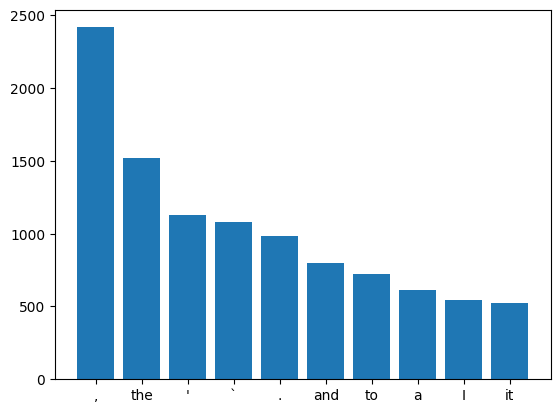

In [39]:
#36. Top-ten frequent words
#Visualize the top-ten frequent words and their frequencies with a chart (e.g., bar chart).
import matplotlib.pyplot as plt

top_ten_words = sorted_word_freq[:10]
words = [word for word, freq in top_ten_words]
freqs = [freq for word, freq in top_ten_words]

plt.bar(words, freqs)
plt.show()

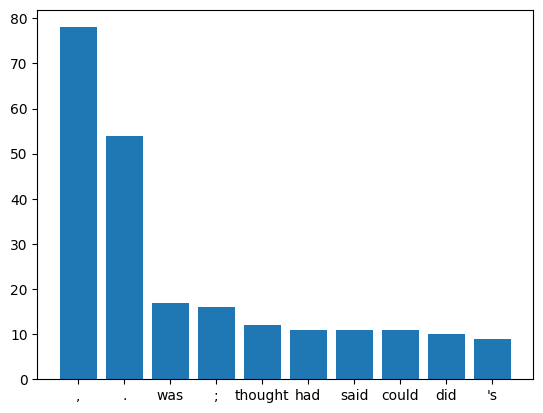

In [40]:
#37. Top-ten words co-occurring with ‘Alice’
#Extract the list of words that co-occur with the word “Alice”.
#Visualize with a chart (e.g., bar chart) the top-ten words co-occurring with the word “Alice” and their frequencies.
alice_cooccurring_words = {}
for sentence in sentences:
    for i in range(len(sentence) - 1):
        if sentence[i]['text'] == 'Alice':
            word = sentence[i + 1]['text']
            if word in alice_cooccurring_words:
                alice_cooccurring_words[word] += 1
            else:
                alice_cooccurring_words[word] = 1

sorted_alice_cooccurring_words = sorted(alice_cooccurring_words.items(), key=lambda x: x[1], reverse=True)
top_ten_alice_cooccurring_words = sorted_alice_cooccurring_words[:10]
words = [word for word, freq in top_ten_alice_cooccurring_words]
freqs = [freq for word, freq in top_ten_alice_cooccurring_words]

plt.bar(words, freqs)
plt.show()

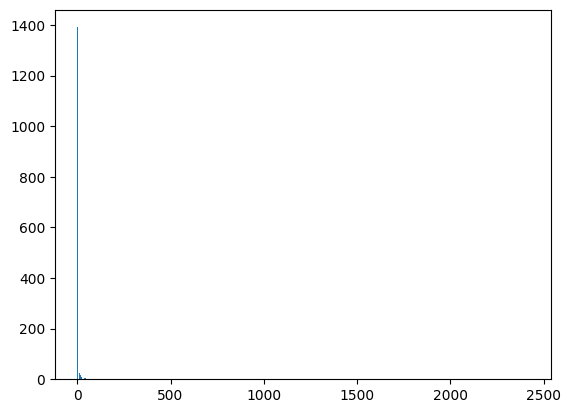

In [43]:
#38. Histogram
#Draw a histogram of word frequency (x-axis is a scalar range representing a frequency ranging from 1 to the largest frequency of a given word in the entire corpus,
#and the y-axis is the count of unique words that fall into the count of the x value).
freq_counts = {}
for word, freq in word_freq.items():
    if freq in freq_counts:
        freq_counts[freq] += 1
    else:
        freq_counts[freq] = 1

x = list(freq_counts.keys())
y = list(freq_counts.values())

plt.bar(x, y)
plt.show()

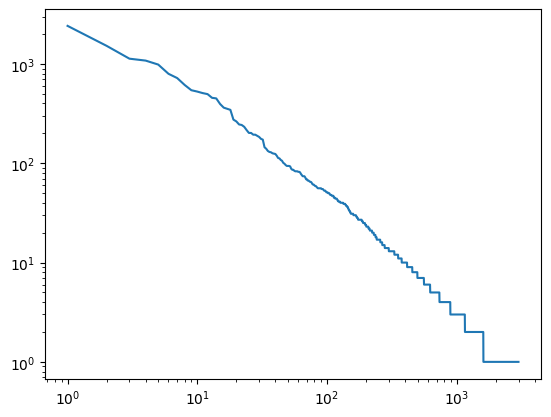

In [45]:
#39. Zipf’s law
#Plot a log-log graph with the x-axis being rank order and the y-axis being frequency.

freqs = [freq for word, freq in sorted_word_freq]

ranks = list(range(1, len(freqs) + 1))
plt.plot(ranks, freqs)
plt.xscale('log')
plt.yscale('log')
plt.show()
